In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/pincodes_all.csv'
data = pd.read_csv(file_path)

# View the first few rows of the dataset to understand its structure
print(data.head())

# Step 1: Feature Engineering
# Select relevant features (region name, district) and the target variable (pincode)
features = ['Region Name', 'District']  # Assuming column names are as such, 'District' instead of 'District Name'
target = 'Pincode'  # Assuming 'Pincode' is the target column

# Handle missing data (if any)
data = data.dropna(subset=features + [target])

# Convert categorical data to numeric using Label Encoding
le_region = LabelEncoder()
le_district = LabelEncoder()

data['Region Name'] = le_region.fit_transform(data['Region Name'])
data['District'] = le_district.fit_transform(data['District']) # Use 'District'

# Features and target
X = data[features]
y = data[target]

# Step 2: Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: K-Fold Cross-validation and Random Forest model training
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# K-Fold cross-validation
kf = KFold(n_splits=5)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

# Train the model
rf_model.fit(X_train, y_train)

# Step 4: Model evaluation
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Prediction Function
def predict_pincode(region_name, district_name):
    # Transform input data to encoded labels
    # Use try-except block to handle unseen labels
    try:
        region_encoded = le_region.transform([region_name])[0]
        district_encoded = le_district.transform([district_name])[0]
    except ValueError:
        # Return a message or handle the unseen label appropriately
        return "Unseen region or district. Please provide values from the training data."

    # Prepare the feature array for prediction
    input_data = [[region_encoded, district_encoded]]

    # Predict the pincode
    predicted_pincode = rf_model.predict(input_data)[0]

    return predicted_pincode

# Example usage for predicting the pincode
region_name_input = 'Kurnool Region'  # Replace with real input
district_name_input = 'ANANTHAPUR'  # Replace with real input

predicted_pincode = predict_pincode(region_name_input, district_name_input)
print(f"Predicted Pincode for {region_name_input}, {district_name_input}: {predicted_pincode}")


             Circle Name     Region Name       Division Name  \
0  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   
1  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   
2  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   
3  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   
4  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   

           Office Name  Pincode OfficeType  Delivery    District  \
0  A Narayanapuram B.O   515004         BO  Delivery  ANANTHAPUR   
1          Akuledu B.O   515731         BO  Delivery  ANANTHAPUR   
2          Alamuru B.O   515002         BO  Delivery  ANANTHAPUR   
3        Allapuram B.O   515766         BO  Delivery  ANANTHAPUR   
4            Aluru B.O   515415         BO  Delivery  ANANTHAPUR   

        StateName  
0  Andhra Pradesh  
1  Andhra Pradesh  
2  Andhra Pradesh  
3  Andhra Pradesh  
4  Andhra Pradesh  
Test Accuracy: 7.04%
Predicted Pincode for Kurnool Region, ANANTHAPUR: 515761


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the CSV data
file_path = '/content/pincodes_all.csv'  # Update this to the correct file path if needed
data = pd.read_csv(file_path)

# Check column names
print(data.columns)

# Step 2: Data Preprocessing
# Handling missing values (fill with forward fill for simplicity)
data.ffill(inplace=True)

# Encoding categorical variables
label_encoders = {}
# Encoding 'District' and 'Region Name' as categorical variables for model
for column in ['District', 'Region Name']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data[['District', 'Region Name']]  # Use District and Region Name as predictors
y = data['Pincode']  # Target variable is the Pincode

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and train the Random Forest model with K-Fold Cross-Validation
rf_model = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=10,         # Maximum depth of each tree
    min_samples_split=10, # Minimum number of samples to split a node
    min_samples_leaf=4,   # Minimum number of samples in a leaf node
    random_state=42
)

# Step 5: Perform K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Step 6: Hyperparameter Tuning Using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=kf, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Step 7: Train the model with the best parameters on the full training set
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Step 8: Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 9: Feature Importance Analysis (optional)
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. Feature {X_train.columns[indices[i]]} ({importances[indices[i]]})")

# Step 10: Predict Pincode for New Entries
def predict_pincode(district_name, region_name):
    # Encode the new inputs using the same label encoders used during training
    encoded_district = label_encoders['District'].transform([district_name])[0]
    encoded_region = label_encoders['Region Name'].transform([region_name])[0]

    # Predict the pincode
    predicted_pincode = best_rf_model.predict([[encoded_district, encoded_region]])

    return predicted_pincode[0]

# Example prediction:
district_input = "Madanapalle"  # Replace with actual district name from the dataset
region_name_input = "Kurnool Region"  # Replace with actual region name from the dataset
predicted_pincode = predict_pincode(district_input, region_name_input)
print(f"Predicted Pincode: {predicted_pincode}")


Index(['Circle Name', 'Region Name', 'Division Name', 'Office Name', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName'],
      dtype='object')
Cross-validated accuracy scores: [0.0699682  0.07284568 0.07345146 0.06799939 0.07360291]
Mean cross-validation accuracy: 0.07157352718461306


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.07893381796153262
Test Accuracy: 0.08541313302641143
Classification Report:
              precision    recall  f1-score   support

      110001       0.42      1.00      0.59         5
      110003       0.00      0.00      0.00         4
      110005       0.00      0.00      0.00         1
      110006       0.00      0.00      0.00         2
      110007       0.10      1.00      0.17         2
      110008       0.00      0.00      0.00         1
      110009       0.00      0.00      0.00         3
      110010       0.38      1.00      0.55         3
      110011       0.00      0.00      0.00         1
      110014       0.00      0.00      0.00         4
      110015       0.00      0.00      0.00         2
      110017       0.00      0.00      0.00         2
      110018       0.19      1.00      0.32         3
      110020       0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

[[5 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature ranking:
1. Feature District (0.8593816206370155)
2. Feature Region Name (0.14061837936298438)
Predicted Pincode: 517326


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Index(['Circle Name', 'Region Name', 'Division Name', 'Office Name', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName'],
      dtype='object')
Cross-validated accuracy scores: [0.96047251 0.96289565 0.96244131 0.96016962 0.96244131]
Mean cross-validation accuracy: 0.9616840829925792
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy: 0.9630168105406632
Test Accuracy: 0.9622001453840562
Classification Report:
              precision    recall  f1-score   support

    Delivery       0.97      1.00      0.98      7872
Non Delivery       0.74      0.28      0.41       382

    accuracy                           0.96      8254
   macro avg       0.85      0.64      0.69      8254
weighted avg       0.96      0.96      0.95      8254

Confusion Matrix:
[[7834   38]
 [ 274  108]]
Feature ranking:
1. Feature Pincode (0.6345832154727228)
2. Feature Office Name (0.2449710586500773)
3. Featu

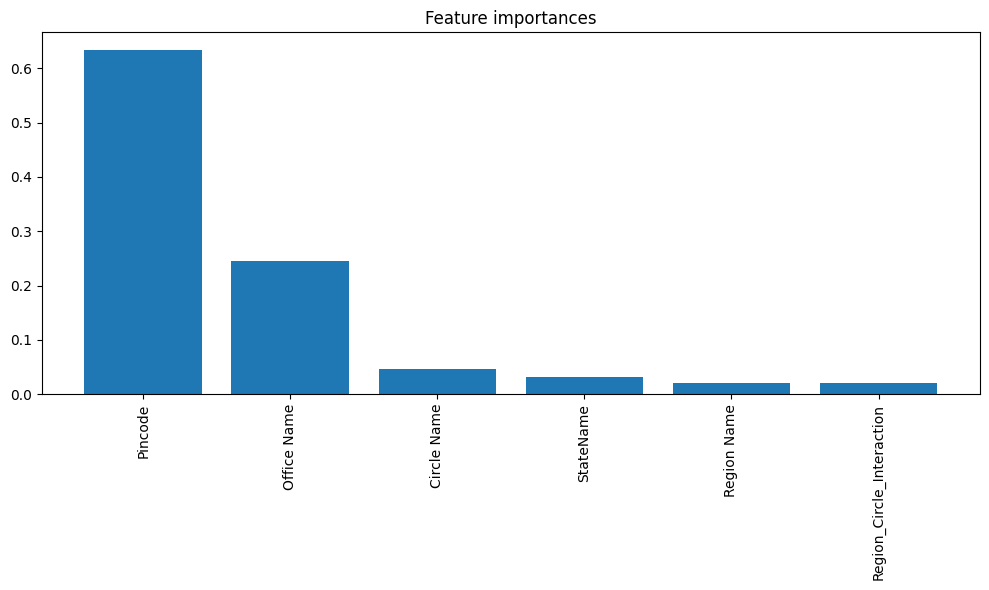

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the CSV data
file_path = '/content/pincodes_all.csv'  # Update this to the correct file path if needed
data = pd.read_csv(file_path)

# Check column names
print(data.columns)  # Add this line to inspect the exact column names

# Step 2: Data Preprocessing
# Handling missing values (fill with forward fill for simplicity)
data.ffill(inplace=True)  # Updated to use ffill() instead of fillna(method='ffill')

# Encoding categorical variables
label_encoders = {}
# Replace the column names as needed based on the print statement from above
for column in ['Office Name', 'Region Name', 'Circle Name', 'StateName']:  # Adjust these column names if necessary
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y) - Using 'Delivery' as the target based on the available columns
X = data[['Pincode', 'Office Name', 'Region Name', 'Circle Name', 'StateName']]  # Verify and adjust column names
y = data['Delivery']  # Replace 'Delivery Status' with 'Delivery'

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Engineering (optional, creating interaction terms as an example)
X_train['Region_Circle_Interaction'] = X_train['Region Name'] * X_train['Circle Name']
X_test['Region_Circle_Interaction'] = X_test['Region Name'] * X_test['Circle Name']

# Step 5: Define and train the Random Forest model with K-Fold Cross-Validation
rf_model = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=10,         # Maximum depth of each tree
    min_samples_split=10, # Minimum number of samples to split a node
    min_samples_leaf=4,   # Minimum number of samples in a leaf node
    random_state=42
)

# Step 6: Perform K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Step 7: Hyperparameter Tuning Using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=kf, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Step 8: Train the model with the best parameters on the full training set
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Step 9: Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 10: Feature Importance Analysis
# Plotting feature importances
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Print the feature ranking
print("Feature ranking:")

for i in range(X_train.shape[1]):
    print(f"{i+1}. Feature {X_train.columns[indices[i]]} ({importances[indices[i]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import requests
import time

# Load the dataset
file_path = '/content/Kurnool_Region_BO_offices.csv'  # Adjust to the actual file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Function to get latitude and longitude from the pincode using OSM Nominatim API
def get_lat_long_osm(pincode):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "postalcode": pincode,
        "countrycodes": "IN",  # Set to India, change it as needed
        "format": "json"
    }
    response = requests.get(base_url, params=params, headers={'User-Agent': 'Mozilla/5.0'})
    if response.status_code == 200 and len(response.json()) > 0:
        result = response.json()[0]
        return result['lat'], result['lon']
    return None, None

# Add Latitude and Longitude columns
df['Latitude'] = None
df['Longitude'] = None

# Iterate through unique pin codes to avoid repeated API calls
unique_pincodes = df['Pincode'].unique()

for pincode in unique_pincodes:
    lat, lng = get_lat_long_osm(pincode)

    # Update the corresponding rows with the latitude and longitude
    df.loc[df['Pincode'] == pincode, 'Latitude'] = lat
    df.loc[df['Pincode'] == pincode, 'Longitude'] = lng

    print(f"Processed Pincode: {pincode} | Latitude: {lat}, Longitude: {lng}")

    # Delay to respect API rate limits
    time.sleep(1)  # Add delay to avoid hitting the request limit

# Save the updated dataset with latitudes and longitudes
output_file = 'Pincode_30052019_with_lat_long_osm.csv'
df.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")

Processed Pincode: 515004 | Latitude: 14.743604210344827, Longitude: 77.6916881275862
Processed Pincode: 515731 | Latitude: 14.8181186, Longitude: 77.59799345
Processed Pincode: 515002 | Latitude: 14.681397621052632, Longitude: 77.61501318421053
Processed Pincode: 515766 | Latitude: 14.2914167, Longitude: 77.0348529
Processed Pincode: 515415 | Latitude: 14.9489458, Longitude: 78.0290549
Processed Pincode: 515741 | Latitude: 14.71633745, Longitude: 77.1308029
Processed Pincode: 515775 | Latitude: 14.946338566666666, Longitude: 77.59040526666666
Processed Pincode: 515455 | Latitude: 15.0627154, Longitude: 77.7825672
Processed Pincode: 515445 | Latitude: 14.9296529, Longitude: 77.8611195
Processed Pincode: 515465 | Latitude: 14.661599, Longitude: 78.03633915
Processed Pincode: 515867 | Latitude: 14.691094, Longitude: 76.972639
Processed Pincode: 515763 | Latitude: None, Longitude: None
Processed Pincode: 515767 | Latitude: 14.44578725, Longitude: 76.9789915
Processed Pincode: 515722 | Lat

In [ ]:
import pandas as pd
from geopy.distance import geodesic

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Display the first few rows and check column names
print(data.head())
print(data.columns)

# Step 1: Filter for SO and BO entries
# Assuming 'OfficeType' contains office type information
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Check the number of SO and BO entries
print(so_bo_data['OfficeType'].value_counts())

# Step 2: Define a function to calculate the midpoint between two latitude-longitude pairs
def calculate_midpoint(lat1, lon1, lat2, lon2):
    return (lat1 + lat2) / 2, (lon1 + lon2) / 2

# Step 3: Find the nearest offices and calculate midpoints
# We will calculate the distance between all pairs of SO/BO offices and find the nearest ones

# Extract necessary columns (Pincode, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'OfficeType', 'Latitude', 'Longitude']]

# Initialize an empty list to store the results
midpoints = []

# Loop through each office and calculate the midpoint with the nearest other office
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values in row1 before creating office1
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue # Skip this row if it has missing values
    office1 = (row1['Latitude'], row1['Longitude'])
    nearest_office = None
    nearest_distance = float('inf')

    for index2, row2 in so_bo_data.iterrows():
        if index1 != index2:  # Skip comparing the office with itself
            # Check for NaN values before creating office2
            if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
                continue # Skip this row if it has missing values
            office2 = (row2['Latitude'], row2['Longitude'])
            distance = geodesic(office1, office2).kilometers  # Calculate distance in kilometers

            if distance < nearest_distance:  # Find the nearest office
                nearest_distance = distance
                nearest_office = row2

    if nearest_office is not None:
        # Calculate the midpoint between the current office and its nearest office
        midpoint_lat, midpoint_lon = calculate_midpoint(row1['Latitude'], row1['Longitude'], nearest_office['Latitude'], nearest_office['Longitude'])

        # Store the result: Pincode, OfficeType, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType
        midpoints.append({
            'Pincode': row1['Pincode'],
            'OfficeType': row1['OfficeType'],
            'Nearest Office Pincode': nearest_office['Pincode'],
            'Midpoint Latitude': midpoint_lat,
            'Midpoint Longitude': midpoint_lon,
            'Nearest OfficeType': nearest_office['OfficeType']
        })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Display the first few midpoints
print(midpoints_df.head())

# Step 4: Save the midpoints to a CSV file if needed
midpoints_df.to_csv('/content/so_bo_midpoints.csv', index=False)
print("Midpoints saved to so_bo_midpoints.csv")

          Circle Name          Region Name     Division Name  \
0  West Bengal Circle  South Bengal Region  Asansol Division   
1  West Bengal Circle  South Bengal Region  Asansol Division   
2  West Bengal Circle  South Bengal Region  Asansol Division   
3  West Bengal Circle  South Bengal Region  Asansol Division   
4  West Bengal Circle  South Bengal Region  Asansol Division   

            Office Name  Pincode OfficeType      Delivery   District  \
0           Amladahi SO   713331         SO  Non Delivery  BARDHAMAN   
1           Amrabati SO   713214         SO  Non Delivery  BARDHAMAN   
2              Andal SO   713321         SO      Delivery  BARDHAMAN   
3  Andal South Bazar SO   713321         SO  Non Delivery  BARDHAMAN   
4           Angadpur SO   713215         SO      Delivery  BARDHAMAN   

     StateName   Latitude  Longitude  
0  West Bengal  23.843889  86.901970  
1  West Bengal  23.554527  87.309468  
2  West Bengal  23.583378  87.178093  
3  West Bengal  23.583378 

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous

# Step 4: Find the nearest office using Dijkstra's Algorithm
midpoints = []

for start_pincode in graph:
    distances, previous = dijkstra(graph, start_pincode)

    # Find the nearest office with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the coordinates of the current office and nearest office
    office1 = so_bo_data[so_bo_data['Pincode'] == start_pincode][['Latitude', 'Longitude']].values[0]
    office2 = so_bo_data[so_bo_data['Pincode'] == nearest_pincode][['Latitude', 'Longitude']].values[0]

    # Calculate the midpoint
    midpoint_lat, midpoint_lon = (office1[0] + office2[0]) / 2, (office1[1] + office2[1]) / 2

    # Store the result: Pincode, OfficeType, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType
    nearest_office_type = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['OfficeType'].values[0]

    midpoints.append({
        'Pincode': start_pincode,
        'OfficeType': so_bo_data[so_bo_data['Pincode'] == start_pincode]['OfficeType'].values[0],
        'Nearest Office Pincode': nearest_pincode,
        'Midpoint Latitude': midpoint_lat,
        'Midpoint Longitude': midpoint_lon,
        'Nearest OfficeType': nearest_office_type
    })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Step 5: Print the first calculated result (nearest pincode and midpoint)
first_result = midpoints_df.iloc[0]
print(f"Nearest Office for Pincode {first_result['Pincode']}:")
print(f"Nearest Office Pincode: {first_result['Nearest Office Pincode']}")
print(f"Midpoint Latitude: {first_result['Midpoint Latitude']}")
print(f"Midpoint Longitude: {first_result['Midpoint Longitude']}")
print(f"Nearest Office Type: {first_result['Nearest OfficeType']}")

# Step 6: Save the midpoints to a CSV file if needed
midpoints_df.to_csv('/content/so_bo_midpoints_dijkstra.csv', index=False)
print("Midpoints saved to so_bo_midpoints_dijkstra1.csv")


Nearest Office for Pincode 713331:
Nearest Office Pincode: 713365
Midpoint Latitude: 23.851775754166667
Midpoint Longitude: 86.89695814583334
Nearest Office Type: SO
Midpoints saved to so_bo_midpoints_dijkstra1.csv


WITH OFFICE NAMES

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, OfficeName, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous

# Step 4: Find the nearest office using Dijkstra's Algorithm
midpoints = []

for start_pincode in graph:
    distances, previous = dijkstra(graph, start_pincode)

    # Find the nearest office with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the coordinates and office name of the current office and nearest office
    office1_data = so_bo_data[so_bo_data['Pincode'] == start_pincode][['Office Name', 'Latitude', 'Longitude']].values[0]
    office2_data = so_bo_data[so_bo_data['Pincode'] == nearest_pincode][['Office Name', 'Latitude', 'Longitude']].values[0]

    # Calculate the midpoint
    midpoint_lat, midpoint_lon = (office1_data[1] + office2_data[1]) / 2, (office1_data[2] + office2_data[2]) / 2

    # Store the result: Pincode, OfficeType, OfficeName, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType, Nearest OfficeName
    nearest_office_type = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['OfficeType'].values[0]
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    midpoints.append({
        'Pincode': start_pincode,
        'Office Name': office1_data[0],
        'Office Type': so_bo_data[so_bo_data['Pincode'] == start_pincode]['OfficeType'].values[0],
        'Nearest Office Pincode': nearest_pincode,
        'Nearest Office Name': nearest_office_name,
        'Midpoint Latitude': midpoint_lat,
        'Midpoint Longitude': midpoint_lon,
        'Nearest OfficeType': nearest_office_type
    })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Step 5: Print all the midpoints directly
print("Nearest offices and midpoints:")
for _, row in midpoints_df.iterrows():
    print(f"Pincode: {row['Pincode']}")
    print(f"Office Name: {row['Office Name']}")
    print(f"Office Type: {row['Office Type']}")
    print(f"Nearest Office Pincode: {row['Nearest Office Pincode']}")
    print(f"Nearest Office Name: {row['Nearest Office Name']}")
    print(f"Midpoint Latitude: {row['Midpoint Latitude']}")
    print(f"Midpoint Longitude: {row['Midpoint Longitude']}")
    print(f"Nearest Office Type: {row['Nearest OfficeType']}")
    print("-" * 40)  # Separator for each result


Nearest offices and midpoints:
Pincode: 713331
Office Name: Amladahi SO
Office Type: SO
Nearest Office Pincode: 713365
Nearest Office Name: Chittaranjan TS SO
Midpoint Latitude: 23.851775754166667
Midpoint Longitude: 86.89695814583334
Nearest Office Type: SO
----------------------------------------
Pincode: 713214
Office Name: Amrabati SO
Office Type: SO
Nearest Office Pincode: 713205
Nearest Office Name: Durgapur Sepco Township SO
Midpoint Latitude: 23.562200224999998
Midpoint Longitude: 87.3074786375
Nearest Office Type: SO
----------------------------------------
Pincode: 713321
Office Name: Andal SO
Office Type: SO
Nearest Office Pincode: 713338
Nearest Office Name: Kajoragram SO
Midpoint Latitude: 23.605676083333332
Midpoint Longitude: 87.18652731666667
Nearest Office Type: SO
----------------------------------------
Pincode: 713215
Office Name: Angadpur SO
Office Type: SO
Nearest Office Pincode: 713207
Nearest Office Name: Durgapur Thermal Power Station SO
Midpoint Latitude: 23.5

SINGLE ENTRY FOR NEAREST

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Input: Pincode for which you want the nearest office
pincode_input = 721647

# Step 5: Get the nearest pincode and office name
nearest_pincode, nearest_office_name = find_nearest_office(pincode_input)

# Output the result
print(f"Pincode: {pincode_input}")
print(f"Nearest Office Pincode: {nearest_pincode}")
print(f"Nearest Office Name: {nearest_office_name}")


Pincode: 721647
Nearest Office Pincode: 721651
Nearest Office Name: Srirampur Mid SO


WITH TRUE WHILE LOOP

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Input loop: Keep asking for valid pincode input continuously
while True:
    try:
        pincode_input = int(input('Enter the pincode: '))

        # Check if the pincode exists in the graph (validity check)
        if pincode_input not in graph:
            print("Invalid pincode. Please enter a valid pincode from the dataset.")
            continue

        # Step 5: Get the nearest pincode and office name
        nearest_pincode, nearest_office_name = find_nearest_office(pincode_input)

        # Output the result
        print(f"Pincode: {pincode_input}")
        print(f"Nearest Office Pincode: {nearest_pincode}")
        print(f"Nearest Office Name: {nearest_office_name}")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


Enter the pincode: 712233
Pincode: 712233
Nearest Office Pincode: 712232
Nearest Office Name: Bhadrakali SO
Enter the pincode: 712233
Pincode: 712233
Nearest Office Pincode: 712232
Nearest Office Name: Bhadrakali SO
Enter the pincode: 713202
Pincode: 713202
Nearest Office Pincode: 713201
Nearest Office Name: Durgapur Rabindra Pally SO
Enter the pincode: 713343
Pincode: 713343
Nearest Office Pincode: 713324
Nearest Office Name: Barakar SO


KeyboardInterrupt: Interrupted by user

WITH OPTIMAL PATH AND THE ON THE WAY PINCODES

> Add blockquote

> Add blockquote





In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the optimal path from source to destination
def dijkstra(graph, start, destination):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}  # Track previous nodes for path reconstruction

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # If we've reached the destination, stop
        if current_node == destination:
            break

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node  # Track the path
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct the shortest path from source to destination
    path = []
    current = destination
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    # Return the shortest path and the total distance
    return path, distances[destination]

# Input loop: Keep asking for valid source and destination pincodes continuously
while True:
    try:
        source_pincode = int(input('Enter the source pincode: '))
        destination_pincode = int(input('Enter the destination pincode: '))

        # Check if both pincodes exist in the graph (validity check)
        if source_pincode not in graph or destination_pincode not in graph:
            print("Invalid pincode. Please enter valid pincodes from the dataset.")
            continue

        # Step 4: Find the optimal path and distance
        optimal_path, total_distance = dijkstra(graph, source_pincode, destination_pincode)

        # Output the result
        print(f"Optimal Path from {source_pincode} to {destination_pincode}: {optimal_path}")
        print(f"Total Distance: {total_distance} km")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


Enter the source pincode: 515004
Enter the destination pincode: 534208
Optimal Path from 515004 to 534208: [515004, 534208]
Total Distance: 455.0885864021763 km


KeyboardInterrupt: Interrupted by user

WITH TRUE WHILE LATITITUTES AND LONGITUDES

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq
from math import radians, sin, cos, atan2, sqrt, degrees

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Step 5: Function to calculate the midpoint between two sets of coordinates
def calculate_midpoint(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate differences
    d_lon = lon2 - lon1

    # Convert latitude and longitude to Cartesian coordinates
    x = cos(lat2) * cos(d_lon)
    y = cos(lat2) * sin(d_lon)

    lat_mid = atan2(sin(lat1) + sin(lat2), sqrt((cos(lat1) + x) ** 2 + y ** 2))
    lon_mid = lon1 + atan2(y, cos(lat1) + x)

    # Convert midpoint back to degrees
    return degrees(lat_mid), degrees(lon_mid)

# Input loop: Keep asking for valid source and destination pincodes continuously
while True:
    try:
        source_pincode = int(input('Enter the source pincode: '))
        destination_pincode = int(input('Enter the destination pincode: '))

        # Check if both pincodes exist in the graph (validity check)
        if source_pincode not in graph or destination_pincode not in graph:
            print("Invalid pincode. Please enter valid pincodes from the dataset.")
            continue

        # Get the latitude and longitude for both pincodes
        source_coords = so_bo_data[so_bo_data['Pincode'] == source_pincode][['Latitude', 'Longitude']].values[0]
        dest_coords = so_bo_data[so_bo_data['Pincode'] == destination_pincode][['Latitude', 'Longitude']].values[0]

        # Step 6: Calculate and display the midpoint
        midpoint_lat, midpoint_lon = calculate_midpoint(source_coords[0], source_coords[1], dest_coords[0], dest_coords[1])

        # Output the result
        print(f"Source Pincode: {source_pincode}")
        print(f"Destination Pincode: {destination_pincode}")
        print(f"Midpoint Coordinates: Latitude = {midpoint_lat}, Longitude = {midpoint_lon}")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


Enter the source pincode: 515741
Enter the destination pincode: 534134
Source Pincode: 515741
Destination Pincode: 534134
Midpoint Coordinates: Latitude = 15.7136540327734, Longitude = 79.35578295793087


KeyboardInterrupt: Interrupted by user

OPTIMAL PATH (SINGLE VALUE )

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter necessary columns and check data structure
print(data.columns)  # Check available columns

# Assuming the dataset has 'Pincode', 'Latitude', 'Longitude' columns
# Extract relevant columns
pincode_data = data[['Pincode', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) based on geodesic distances
graph = {}
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])

    graph[pincode1] = []

    for index2, row2 in pincode_data.iterrows():
        if index1 != index2:
            pincode2 = row2['Pincode']
            if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
                continue
            office2 = (row2['Latitude'], row2['Longitude'])
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Add the distance between pincodes

# Step 3: Dijkstra’s Algorithm for finding shortest path
def dijkstra(graph, start, destination):
    pq = [(0, start, [])]  # (distance, node, path)
    visited = set()

    while pq:
        (current_distance, current_node, path) = heapq.heappop(pq)

        if current_node in visited:
            continue
        visited.add(current_node)

        # Add the current node to the path
        path = path + [current_node]

        # If we reach the destination, return the path and the total distance
        if current_node == destination:
            return path, current_distance

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            if neighbor not in visited:
                heapq.heappush(pq, (current_distance + neighbor_distance, neighbor, path))

    return None, float('inf')  # If no path found

# Step 4: Get user input for source and destination pincodes
try:
    source_pincode = 515004  # You can change this to user input
    destination_pincode = 534208  # You can change this to user input

    # Step 5: Find the optimal path using Dijkstra's algorithm
    optimal_path, total_distance = dijkstra(graph, source_pincode, destination_pincode)

    # Output the result
    print(f"Optimal Path from {source_pincode} to {destination_pincode}: {optimal_path}")
    print(f"Total Distance: {total_distance} km")

except ValueError:
    print("Invalid input. Please enter a valid numeric pincode.")


Index(['Circle Name', 'Region Name', 'Division Name', 'Office Name', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName', 'Latitude',
       'Longitude'],
      dtype='object')
Optimal Path from 515004 to 534208: [515004, 534208.0]
Total Distance: 455.0885864021763 km
